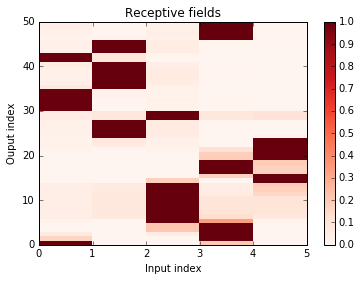

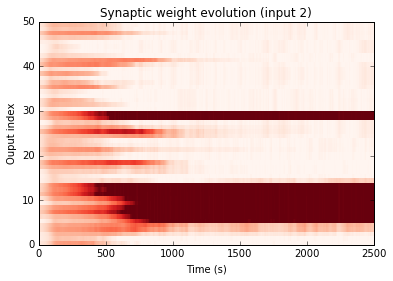

In [3]:
# this cell runs simulations of receptive field development in a feedforward network with diffusive BCM plasticity. It reproduces Fig 5C,E from the paper (or Fig 5B,D when standard BCM option is chosen)

%matplotlib inline

import ff_network_functions_spatial_clean as FF_net

import numpy as np
import itertools

from matplotlib import pyplot as plt
from scipy import stats

from NeuroTools import stgen

FF_net.dt = .05
    
FF_net.N_inputs = 5 
FF_net.N_outputs = 50

FF_net.r_max=20.0

FF_net.N_orientations = 4

FF_net.ext_OU_noise = True
FF_net.ext_OU_tau = 50.0
FF_net.ext_OU_sigma = 0.0

x = np.zeros((FF_net.N_inputs,1))
y = np.zeros((FF_net.N_outputs,1))

H_0 = 2.5
FF_net.H = np.ones((FF_net.N_inputs))*H_0
FF_net.H_max = 10.0
FF_net.H_min = H_0

#np.random.seed(1111)

# creates diffusive range matrix with sigma_d = 0.025. 
sigma_d = 0.025
x_coords, y_coords, euclid_distances, diffusion_distances = FF_net.generate_spatial_coordinates(FF_net.N_outputs,'uniform_exc_ordered_1D',0.01,'gaussian',sigma_d,True)
# making individual firing rate contribution larger
diffusion_distances+=np.identity(FF_net.N_outputs)*1

FF_net.W_max = 1.0
W = np.random.random((FF_net.N_outputs,FF_net.N_inputs))*FF_net.W_max*0.25

FF_net.alpha = 5e-8
FF_net.BCM_target = 5.0
FF_net.BCM_lambda=1.0 #Set < 1 for synaptic weight decay
 
FF_net.theta_BCM = np.ones((FF_net.N_outputs,1))*FF_net.BCM_target
FF_net.theta_BCM_dt = 10.0e-5

FF_net.HIP_target = np.ones((FF_net.N_outputs,1))*FF_net.BCM_target
FF_net.y_dt = FF_net.theta_BCM_dt
FF_net.HIP_dt = FF_net.alpha

T_static = 5000
T_plastic = 2500000
T_measure = 10000

FF_net.T_input_gen = min(100000,T_plastic/10)

T = T_static+T_plastic

stgen_drive = stgen.StGen()
FF_net.OU_drive = stgen_drive.OU_generator(1.,10.0,H_0,0.,0.,T).signal

pop_rate = []

FF_net.N_sample = min(FF_net.N_outputs,FF_net.N_inputs)
FF_net.sample_res = 1000

x,y,W,pop_rate_plastic,sample_rates_plastic,sample_weights,mean_incoming_weight,theta_BCM,sample_theta_BCM = FF_net.run_net_plastic_sliding_threshold(x,y,W,FF_net.theta_BCM,T_plastic,FF_net.N_sample,'random_dynamic',FF_net.N_orientations,0,False,diffusion_distances,True,'inner')

#For no spatial averaging, in order to recreate Figs 5B,D, use below line instead
#x,y,W,pop_rate_plastic,sample_rates_plastic,sample_weights,mean_incoming_weight,theta_BCM,sample_theta_BCM  = FF_net.run_net_plastic_sliding_threshold(x,y,W,FF_net.theta_BCM,T_plastic,FF_net.N_sample,'random_dynamic',FF_net.N_orientations,0,False,diffusion_distances,False,'inner')

x_plastic = x.copy()
y_plastic = y.copy()
W_plastic = W.copy()
theta_BCM_plastic = theta_BCM.copy()

#fig,axes = plt.subplots()
#axes.plot(pop_rate_plastic,lw=5)
#axes.plot(sample_rates_plastic)

#axes.set_title('firing rates',fontsize=20)
#axes.set_xlabel('timesteps',fontsize=20)
#axes.set_ylabel('firing rate',fontsize=20)

fig,axes = plt.subplots()
plt.pcolor(W_plastic,cmap='Reds',vmin=0,vmax=FF_net.W_max)
axes.set_xlabel('Input index')
axes.set_ylabel('Ouput index')
axes.set_title('Receptive fields')
plt.colorbar()

fig,axes = plt.subplots()
axes.set_title('Synaptic weight evolution (input 2)')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Ouput index')
plt.pcolor(sample_weights[:,:,2].transpose(),cmap='Reds')